In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns # statistical data visualization
get_ipython().run_line_magic('matplotlib', 'inline')
from google.colab import drive


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
df1 = pd.read_csv("/content/drive/MyDrive/Machine learning/Balance dataset Analysis/Breast_cancer_data.csv")
df1.head(100)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
1,20.570,17.77,132.90,1326.0,0.08474,0
2,19.690,21.25,130.00,1203.0,0.10960,0
3,11.420,20.38,77.58,386.1,0.14250,0
4,20.290,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0
96,12.180,17.84,77.79,451.1,0.10450,1
97,9.787,19.94,62.11,294.5,0.10240,1
98,11.600,12.84,74.34,412.6,0.08983,1


### 🤖 Why Do We Need Training Algorithms in Machine Learning?

Training algorithms are essential in machine learning because they allow models to **learn patterns** from data. During training, an algorithm analyzes input data and adjusts internal parameters (like weights in a neural network) to **minimize errors** and improve predictions.

Without training, a model cannot generalize or make accurate predictions on new, unseen data. Training turns raw data into a **useful predictive model**.

---

### 🔟 Common Basic Machine Learning Algorithms

1. **Linear Regression** – for predicting continuous values.
2. **Logistic Regression** – for binary classification problems.
3. **Decision Tree** – for both classification and regression using tree structures.
4. **Random Forest** – an ensemble of decision trees to improve accuracy.
5. **K-Nearest Neighbors (KNN)** – classifies based on closest data points.
6. **Support Vector Machine (SVM)** – finds the optimal hyperplane for classification.
7. **Naive Bayes** – based on Bayes' theorem with strong independence assumptions.
8. **K-Means Clustering** – an unsupervised algorithm for grouping similar data.
9. **Gradient Boosting Machines (GBM)** – builds models sequentially to minimize error.
10. **Artificial Neural Networks (ANN)** – inspired by the human brain, great for complex patterns.

Each algorithm has different strengths and is chosen based on the problem type, dataset size, and required accuracy.


### ⚖️ Why Is Data Balancing Important?

Data balancing is crucial when working with imbalanced datasets because most machine learning algorithms assume **equal class distribution**. Without balancing, the model may become **biased toward the majority class**, leading to poor performance on the minority class.

---

### 🛠️ Common Data Balancing Techniques:

- Random Oversampling  
- Random Undersampling  
- SMOTE (Synthetic Minority Over-sampling Technique)  
- ADASYN (Adaptive Synthetic Sampling)  
- Tomek Links  
- NearMiss  
- SMOTENC (for categorical + numerical data)


# **Method 1: Undersampling**

### 📉 Undersampling – Theory

Undersampling is a technique used to handle class imbalance by **reducing the number of samples** from the majority class.

#### 🔹 How It Works:
- Randomly remove samples from the majority class until it matches the size of the minority class.

#### ✅ Pros:
- Reduces training time.
- Avoids overfitting to majority class.

#### ⚠️ Cons:
- Risk of losing important information from the majority class.


In [19]:
# Class count for 'Suicidal thoughts'
count_class_0, count_class_1 = df1['diagnosis'].value_counts()

# Divide by class based on 'Suicidal thoughts'
df1_class_0 = df1[df1['diagnosis'] == 0]
df1_class_1 = df1[df1['diagnosis'] == 1]

# Print out the sizes of each class subset to verify
print("Number of entries where 'diagnosis' is 0:", df1_class_0.shape[0])
print("Number of entries where 'diagnosis' is 1:", df1_class_1.shape[0])

Number of entries where 'diagnosis' is 0: 212
Number of entries where 'diagnosis' is 1: 357


In [23]:
# Count both classes
count_class_0 = len(df1_class_0)
count_class_1 = len(df1_class_1)

# Undersample class 1 to match class 0
if count_class_1 > count_class_0:
    df1_class_1_under = df1_class_1.sample(n=count_class_0, random_state=42)
    df1_test_under = pd.concat([df1_class_0, df1_class_1_under], axis=0)

    # Shuffle the final dataset
    df1_test_under = df1_test_under.sample(frac=1, random_state=42).reset_index(drop=True)

    # Print class distribution
    print("Random under-sampling:")
    print(df1_test_under['diagnosis'].value_counts())
else:
    print("No undersampling needed or class 0 is majority.")


Random under-sampling:
diagnosis
0    212
1    212
Name: count, dtype: int64


In [24]:
# Correct variable names
X = df1_test_under.drop('diagnosis', axis='columns')
y = df1_test_under['diagnosis']

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Optionally, print the sizes of the resulting datasets to verify
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 339
Test set size: 85


In [25]:
# Number of classes in training Data
y_train.value_counts()

,count
diagnosis,
1,170
0,169


In [26]:
X_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
168,13.45,18.30,86.60,555.1,0.10220
233,11.27,12.96,73.16,386.3,0.12370
67,13.17,18.66,85.98,534.6,0.11580
341,14.06,17.18,89.75,609.1,0.08045
98,14.03,21.25,89.79,603.4,0.09070
...,...,...,...,...,...
280,11.84,18.70,77.93,440.6,0.11090
282,19.16,26.60,126.20,1138.0,0.10200
350,20.44,21.78,133.80,1293.0,0.09150
389,27.42,26.27,186.90,2501.0,0.10840


Number of entries where 'diagnosis' is 0: 212
Number of entries where 'diagnosis' is 1: 357
Random under-sampling:
diagnosis
1    357
0    212
Name: count, dtype: int64
Output for split 1
51 out of 57 predictions correct
Accuracy: 0.8947368421052632
[[19  3]
 [ 3 32]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.91      0.91      0.91        35

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57



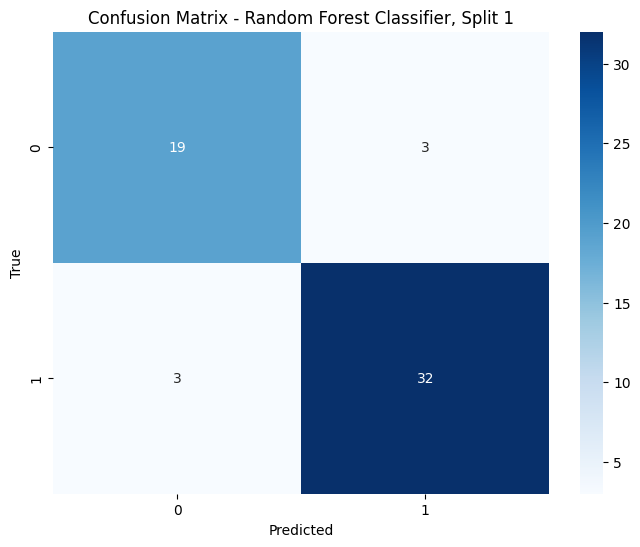

Output for split 2
49 out of 57 predictions correct
Accuracy: 0.8596491228070176
[[15  7]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.94      0.68      0.79        22
           1       0.83      0.97      0.89        35

    accuracy                           0.86        57
   macro avg       0.88      0.83      0.84        57
weighted avg       0.87      0.86      0.85        57



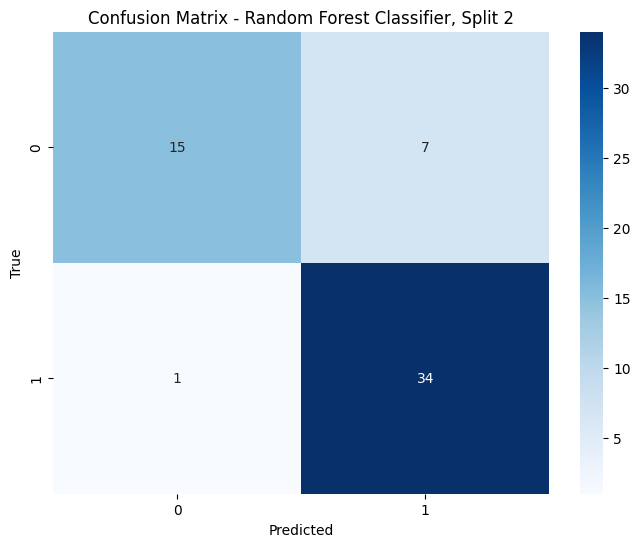

Output for split 3
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[19  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



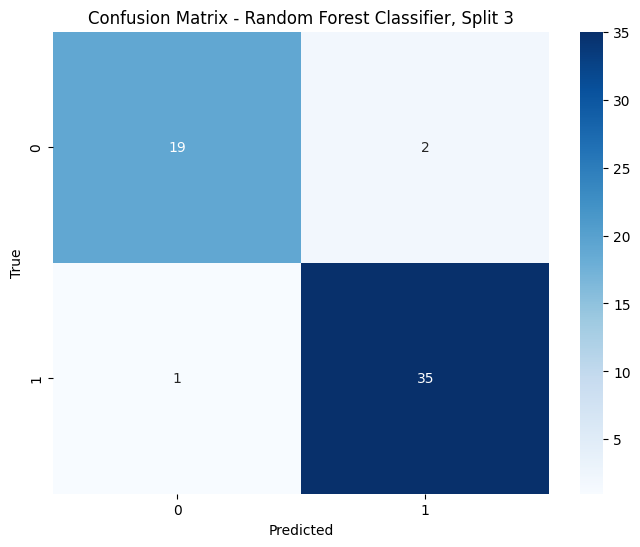

Output for split 4
49 out of 57 predictions correct
Accuracy: 0.8596491228070176
[[14  7]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.93      0.67      0.78        21
           1       0.83      0.97      0.90        36

    accuracy                           0.86        57
   macro avg       0.88      0.82      0.84        57
weighted avg       0.87      0.86      0.85        57



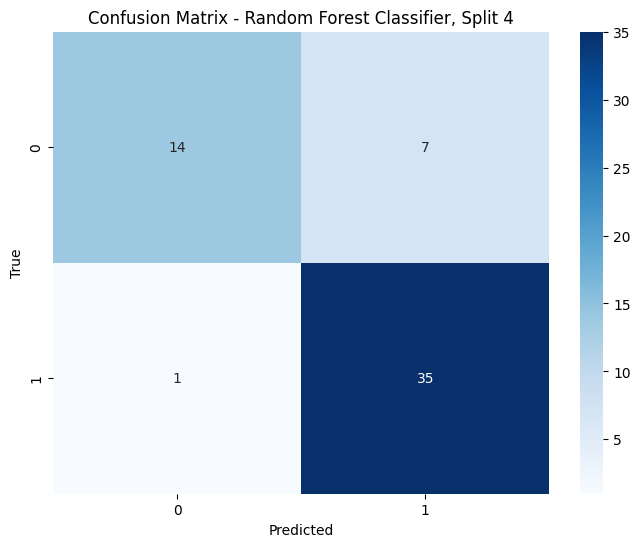

Output for split 5
53 out of 57 predictions correct
Accuracy: 0.9298245614035088
[[18  3]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.97      0.95        36

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



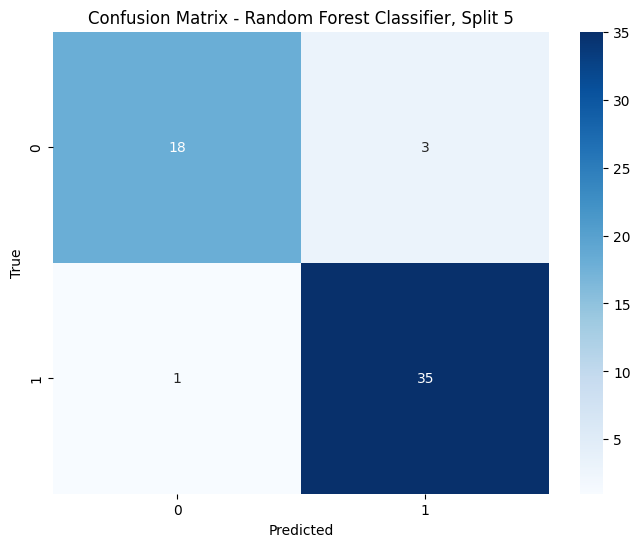

Output for split 6
55 out of 57 predictions correct
Accuracy: 0.9649122807017544
[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



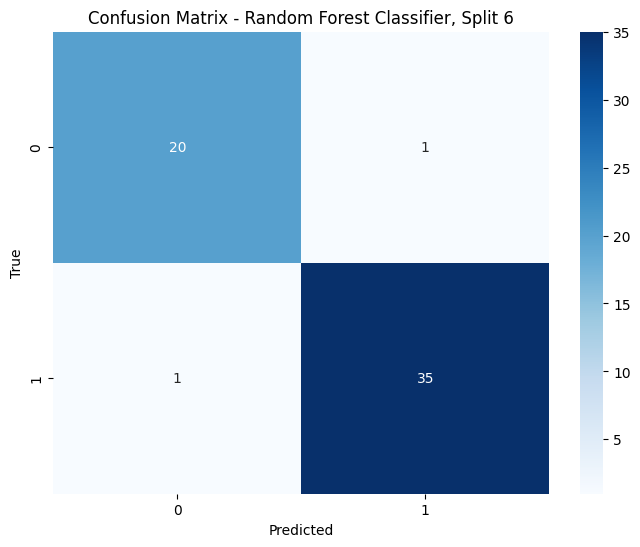

Output for split 7
53 out of 57 predictions correct
Accuracy: 0.9298245614035088
[[20  1]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.97      0.92      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.93      0.93        57
weighted avg       0.93      0.93      0.93        57



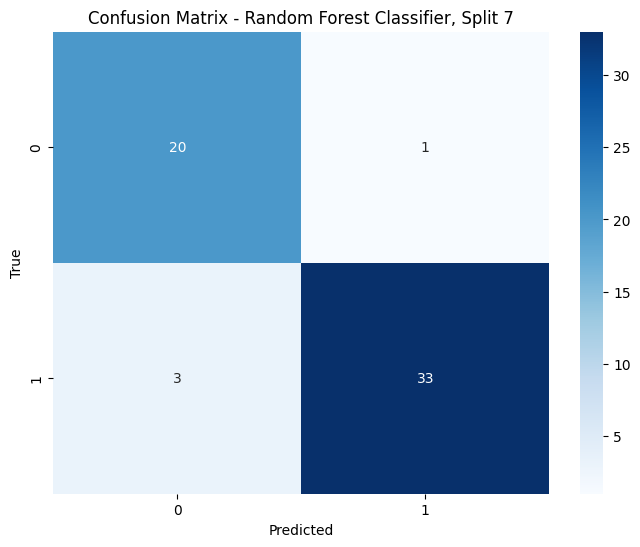

Output for split 8
52 out of 57 predictions correct
Accuracy: 0.9122807017543859
[[18  3]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.92      0.94      0.93        36

    accuracy                           0.91        57
   macro avg       0.91      0.90      0.90        57
weighted avg       0.91      0.91      0.91        57



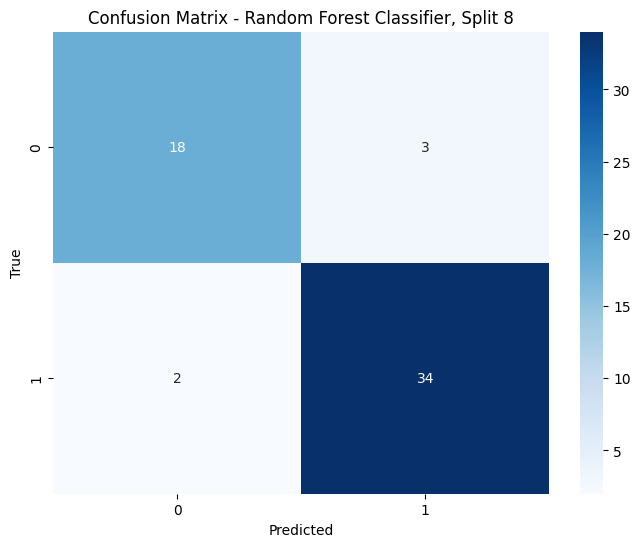

Output for split 9
55 out of 57 predictions correct
Accuracy: 0.9649122807017544
[[21  0]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.94      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.97      0.96        57
weighted avg       0.97      0.96      0.97        57



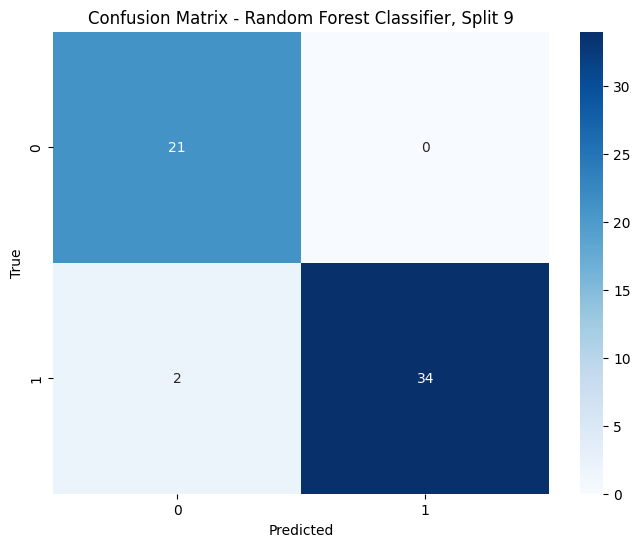

Output for split 10
52 out of 56 predictions correct
Accuracy: 0.9285714285714286
[[19  2]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        35

    accuracy                           0.93        56
   macro avg       0.92      0.92      0.92        56
weighted avg       0.93      0.93      0.93        56



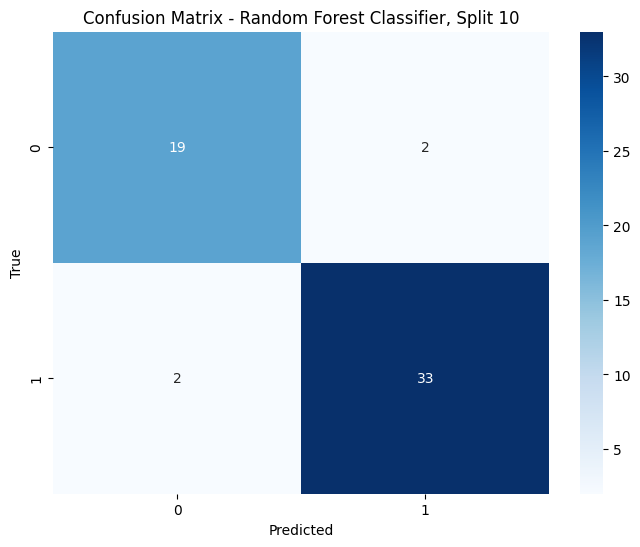

Final mean accuracy: 0.9191729323308271
Best single split accuracy: 0.9649122807017544


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df1 is your DataFrame and 'diagnosis' is the binary target column
# Class count for 'diagnosis'
count_class_0, count_class_1 = df1['diagnosis'].value_counts()

# Divide by class based on 'diagnosis'
df1_class_0 = df1[df1['diagnosis'] == 0]
df1_class_1 = df1[df1['diagnosis'] == 1]

# Optionally, print out the sizes of each class subset to verify
print("Number of entries where 'diagnosis' is 0:", df1_class_0.shape[0])
print("Number of entries where 'diagnosis' is 1:", df1_class_1.shape[0])

# Undersample 0-class to match the number of 1-class instances
df1_class_0_under = df1_class_0.sample(count_class_1, random_state=42)

# Concatenate the undersampled DataFrame of 0-class with the 1-class DataFrame
df1_test_under = pd.concat([df1_class_0_under, df1_class_1], axis=0)

# Print the new class distribution to verify undersampling
print('Random under-sampling:')
print(df1_test_under['diagnosis'].value_counts())

# Prepare features and target
X = df1_test_under.drop('diagnosis', axis='columns')
y = df1_test_under['diagnosis']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Output for split {i}")

    # Train the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Print final results
print("Final mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))


In [31]:
from sklearn import metrics

# **Method2: Oversampling**

### 📈 Oversampling – Theory

Oversampling is a technique to balance class distribution by **increasing the number of samples** in the minority class.

#### 🔹 How It Works:
- Duplicate existing minority class samples (Random Oversampling), or
- Generate new synthetic samples (e.g., SMOTE).

#### ✅ Pros:
- No information loss from the majority class.
- Improves model sensitivity to minority class.

#### ⚠️ Cons:
- May lead to overfitting if using simple duplication.


In [32]:
# Assuming df1_class_1 is the minority class and df1_class_0 is the majority class

# Oversample class 1 to match the size of class 0
df1_class_1_over = df1_class_1.sample(count_class_0, replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df1_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df1_test_over = df1_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'diagnosis' to verify oversampling
print('Random over-sampling:')
print(df1_test_over['diagnosis'].value_counts())


Random over-sampling:
diagnosis
1    357
0    212
Name: count, dtype: int64


In [33]:
# Verify the structure of the new DataFrame
print(df1_test_over.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None


In [34]:
X = df1_test_over.drop('diagnosis',axis='columns')
y = df1_test_over['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [35]:
# Number of classes in training Data
y_train.value_counts()

,count
diagnosis,
1,285
0,170


Random over-sampling:
diagnosis
1    357
0    212
Name: count, dtype: int64
Output for split 1
55 out of 57 predictions correct
Accuracy: 0.9649122807017544
[[20  2]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        22
           1       0.95      1.00      0.97        35

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



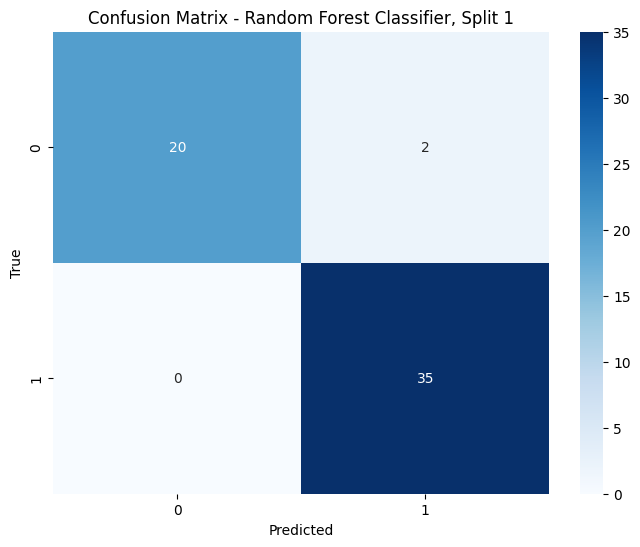

Output for split 2
52 out of 57 predictions correct
Accuracy: 0.9122807017543859
[[18  4]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        22
           1       0.89      0.97      0.93        35

    accuracy                           0.91        57
   macro avg       0.92      0.89      0.90        57
weighted avg       0.92      0.91      0.91        57



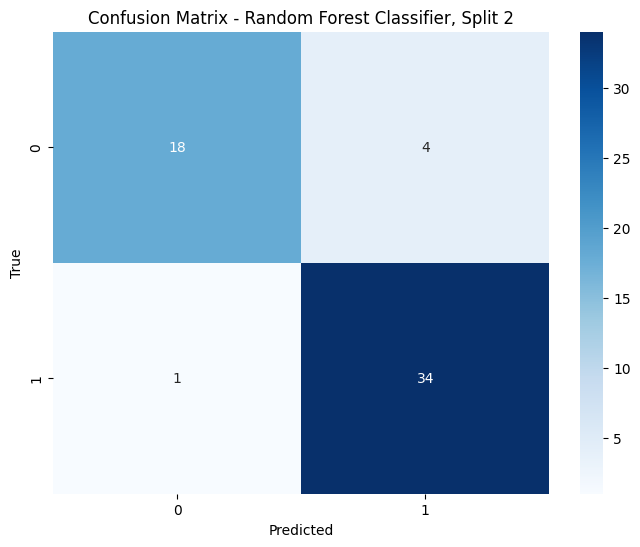

Output for split 3
53 out of 57 predictions correct
Accuracy: 0.9298245614035088
[[18  3]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.92      0.97      0.95        36

    accuracy                           0.93        57
   macro avg       0.93      0.91      0.92        57
weighted avg       0.93      0.93      0.93        57



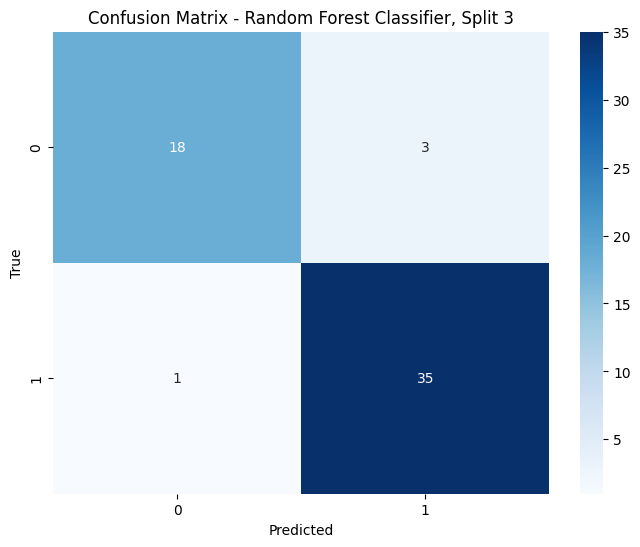

Output for split 4
56 out of 57 predictions correct
Accuracy: 0.9824561403508771
[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



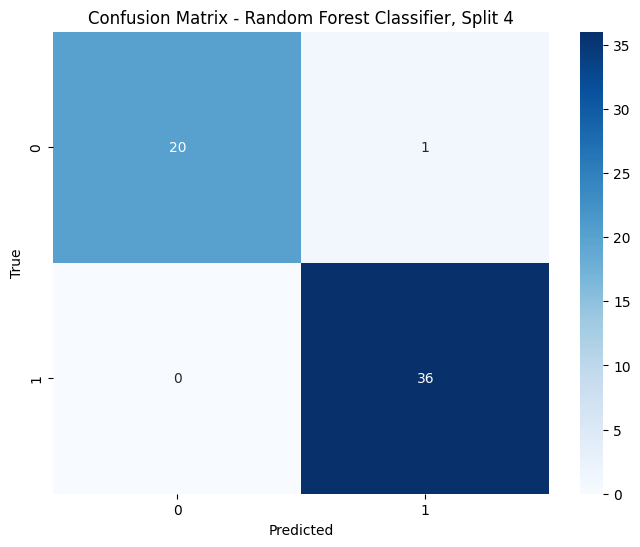

Output for split 5
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[19  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



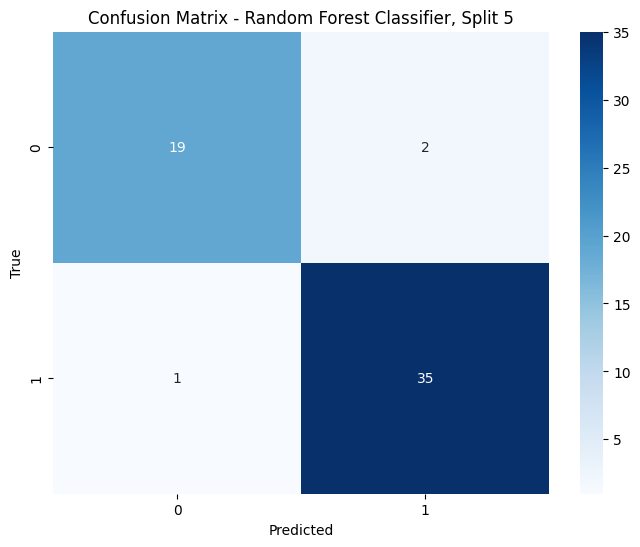

Output for split 6
56 out of 57 predictions correct
Accuracy: 0.9824561403508771
[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



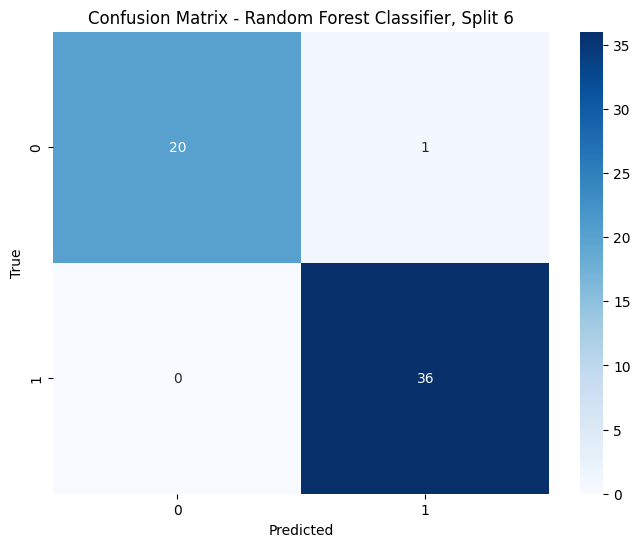

Output for split 7
55 out of 57 predictions correct
Accuracy: 0.9649122807017544
[[19  2]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.95      1.00      0.97        36

    accuracy                           0.96        57
   macro avg       0.97      0.95      0.96        57
weighted avg       0.97      0.96      0.96        57



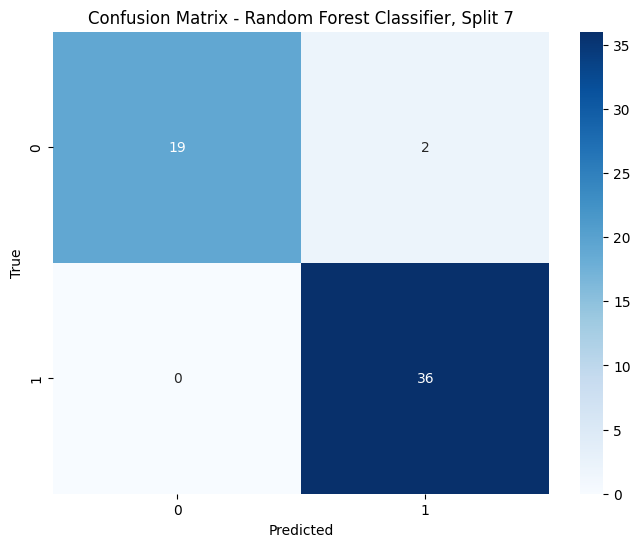

Output for split 8
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[18  3]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.92      1.00      0.96        36

    accuracy                           0.95        57
   macro avg       0.96      0.93      0.94        57
weighted avg       0.95      0.95      0.95        57



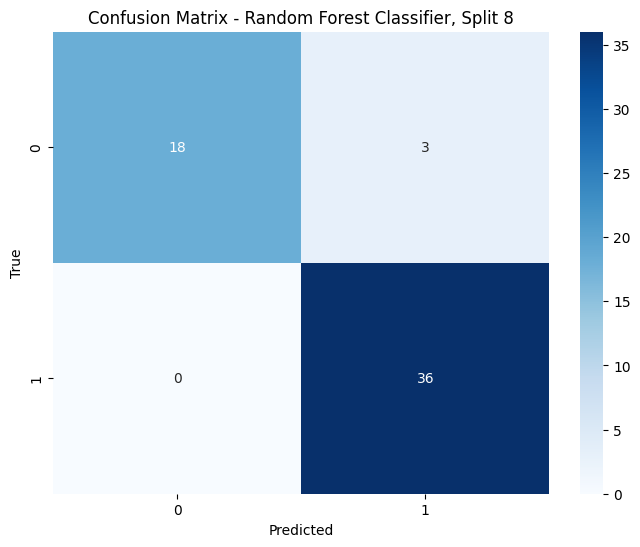

Output for split 9
54 out of 57 predictions correct
Accuracy: 0.9473684210526315
[[19  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



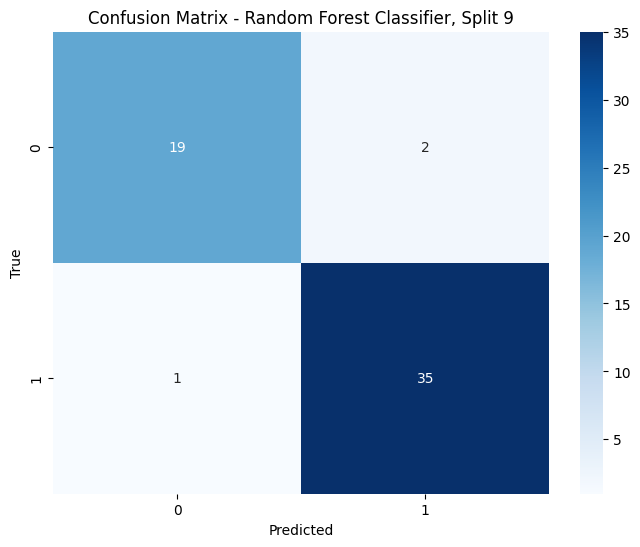

Output for split 10
54 out of 56 predictions correct
Accuracy: 0.9642857142857143
[[20  1]
 [ 1 34]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        35

    accuracy                           0.96        56
   macro avg       0.96      0.96      0.96        56
weighted avg       0.96      0.96      0.96        56



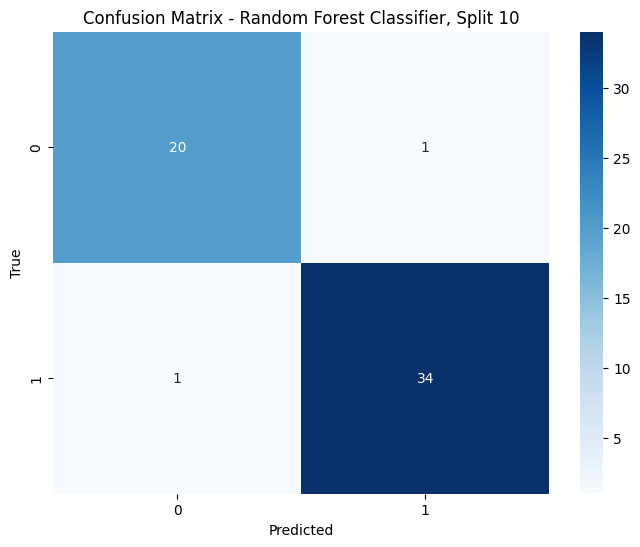

Final mean accuracy: 0.9543233082706767
Best single split accuracy: 0.9824561403508771


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming df1_class_1 is the minority class and df1_class_0 is the majority class
# Oversample class 1 to match the size of class 0
df1_class_1_over = df1_class_1.sample(count_class_0, replace=True, random_state=42)  # Enable replacement to allow for duplication

# Concatenate the oversampled class 1 DataFrame with the class 0 DataFrame
df1_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

# Shuffle the DataFrame rows to mix class data (good practice for training datasets)
df1_test_over = df1_test_over.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the updated counts for 'diagnosis' to verify oversampling
print('Random over-sampling:')
print(df1_test_over['diagnosis'].value_counts())

# Prepare features and target
X = df1_test_over.drop('diagnosis', axis='columns')
y = df1_test_over['diagnosis']

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Output for split {i}")

    # Train the RandomForestClassifier
    clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate accuracy and store results
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
    print("Accuracy:", accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Random Forest Classifier, Split {i}')
    plt.show()

# Print final results
print("Final mean accuracy:", np.mean(scores))
print("Best single split accuracy:", np.max(scores))


# **Method3: SMOTE**

In [38]:
 pip install imbalanced-learn

In [39]:
df2 = pd.get_dummies(data=df1)
df2.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [40]:
X = df2.drop('diagnosis',axis='columns')
y = df2['diagnosis']

### 💡 SMOTE (Synthetic Minority Over-sampling Technique) – Theory

SMOTE is a powerful technique used to address **class imbalance** in classification problems, where one class (the *minority class*) has significantly fewer samples than the other (the *majority class*).

---

#### 🔍 Objective:
To generate **synthetic data points** for the minority class so that it has a more balanced representation compared to the majority class. This helps machine learning models learn better and avoid being biased toward the majority class.

---

#### ⚙️ How SMOTE Works:
1. **Select a minority class sample** at random.
2. **Find its k-nearest neighbors** (typically `k=5`) within the same class.
3. **Randomly select one neighbor** and compute the difference between the selected sample and its neighbor.
4. **Multiply this difference by a random number** between 0 and 1, and **add it to the original sample** to create a synthetic sample.
5. Repeat the process until the desired number of synthetic samples is created.

---

#### 📌 Characteristics:
- Generates **new, unique samples** (not duplicates).
- Helps **reduce overfitting** caused by random oversampling.
- Works best with **numerical data** (for mixed data, use `SMOTENC` or similar).

---

#### ✅ Benefits:
- Balances the dataset.
- Improves model performance on minority classes.
- Easy to integrate with common machine learning workflows.


### ⚖️ Understanding SMOTE with a Real-Life Analogy

Imagine you're organizing a sports team, and you want a balanced group of **boys and girls**.

- You have:
  - ✅ 10 boys
  - ❌ Only 2 girls

This is **imbalanced**, just like an imbalanced dataset where one class has many samples and another has very few.

---

### 🧠 The Problem:
If the coach (your ML model) trains with mostly boys, they might assume **only boys are players** — this creates a bias.

---

### 🎯 SMOTE to the Rescue:

Instead of just copying the 2 girls over and over (random oversampling), SMOTE creates **new, realistic "synthetic" girls** by blending the traits of the existing ones.

---

### 👧 Example:

- Girl A: 5'4", fast, good at passing  
- Girl B: 5'6", moderate speed, good at shooting

SMOTE might create a **new girl** who is:  
➡️ 5'5", fast, good at both passing and shooting  

She isn’t a clone — she’s a **smart combination** of A and B.

---

### 🔬 In Data Terms:

- **Girl A and B** = real minority class samples  
- **New Girl** = synthetic data point (interpolated using SMOTE)

---

### ✅ Final Result:

You now have:
- 10 boys  
- 10 girls (2 real + 8 realistic, synthetic)

This balances the dataset and helps the ML model train fairly on both classes.



In [41]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority')

# Apply SMOTE
X_sm, y_sm = smote.fit_resample(X, y)

# Check the class distribution after SMOTE
print(y_sm.value_counts())


diagnosis
0    357
1    357
Name: count, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [43]:
# Number of classes in training Data
y_train.value_counts()

,count
diagnosis,
1,286
0,285


Output for split 1
107 out of 114 predictions correct
Accuracy: 0.9385964912280702
[[41  2]
 [ 5 66]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



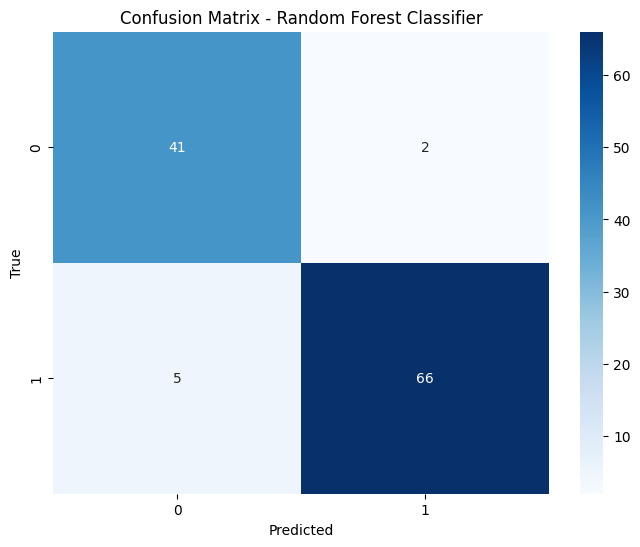

Output for split 2
106 out of 114 predictions correct
Accuracy: 0.9298245614035088
[[37  6]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        43
           1       0.92      0.97      0.95        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



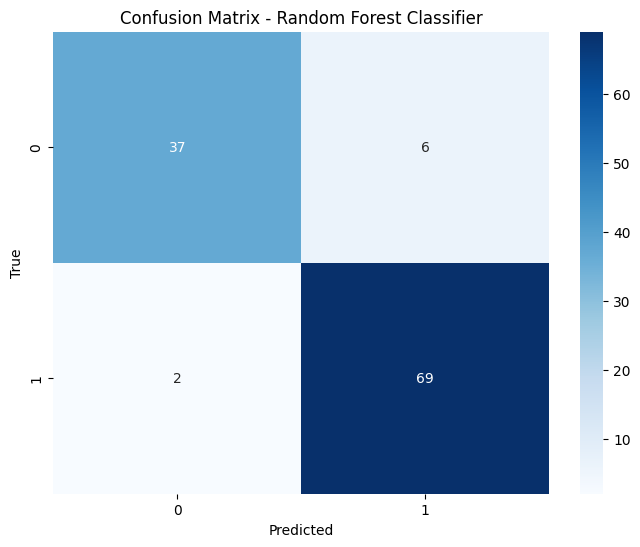

Output for split 3
102 out of 114 predictions correct
Accuracy: 0.8947368421052632
[[32 10]
 [ 2 70]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.88      0.97      0.92        72

    accuracy                           0.89       114
   macro avg       0.91      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



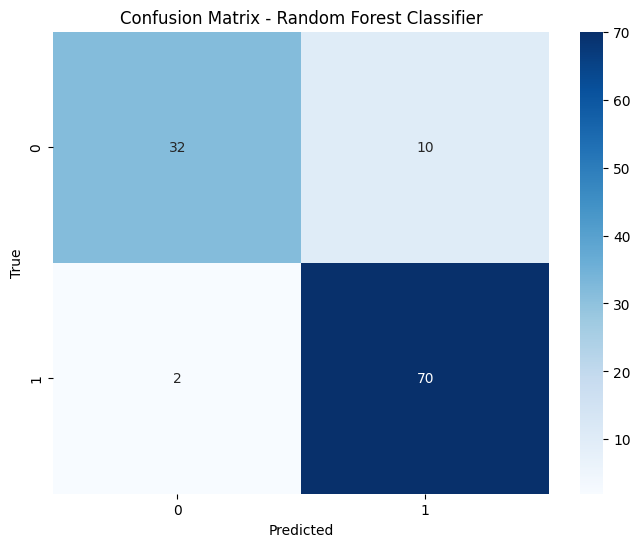

Output for split 4
108 out of 114 predictions correct
Accuracy: 0.9473684210526315
[[40  2]
 [ 4 68]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



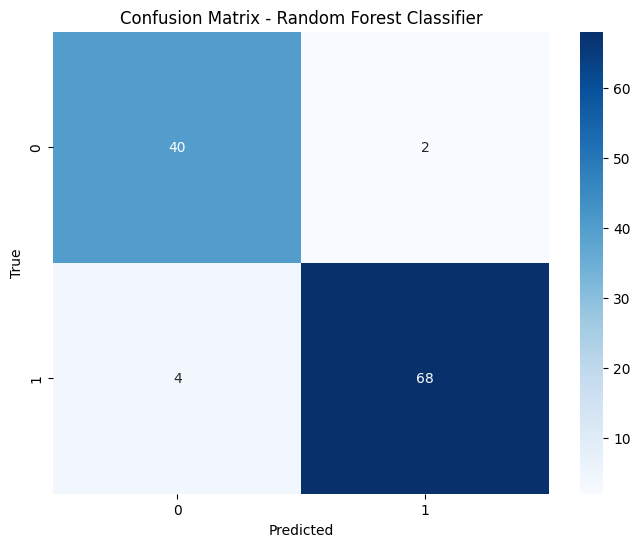

Output for split 5
104 out of 113 predictions correct
Accuracy: 0.9203539823008849
[[38  4]
 [ 5 66]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        42
           1       0.94      0.93      0.94        71

    accuracy                           0.92       113
   macro avg       0.91      0.92      0.92       113
weighted avg       0.92      0.92      0.92       113



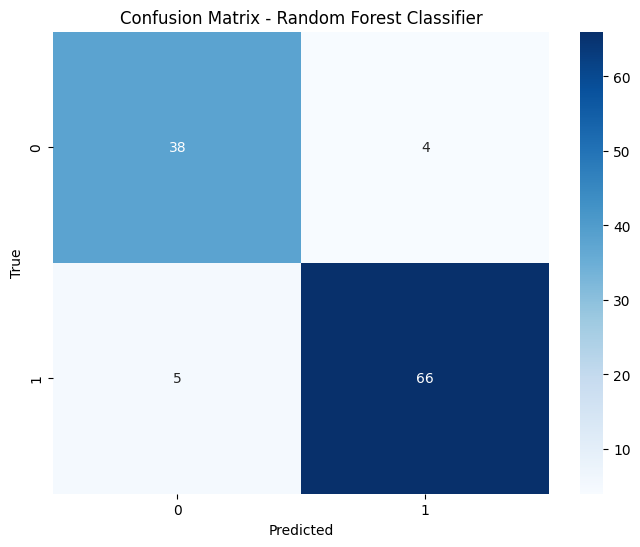

Final mean result: 0.9261760596180716
Best accuracy: 0.9473684210526315


In [44]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

# Assuming X and y are defined as:
# X = df2.drop('diagnosis', axis='columns')
# y = df2['diagnosis']

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority')

if __name__ == "__main__":
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = []
    accuracies = []  # To store accuracy for each fold

    for i, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE to the training data only
        X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

        print(f"Output for split {i}")

        clf = RandomForestClassifier(max_depth=10, n_estimators=350, random_state=42)
        clf.fit(X_train_sm, y_train_sm)  # Train on the resampled train set
        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"{np.sum(y_pred == y_test)} out of {len(y_pred)} predictions correct")
        print("Accuracy:", accuracy)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))

        # Plot confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix - Random Forest Classifier')
        plt.show()

    print("Final mean result:", np.mean(accuracies))
    print("Best accuracy:", np.max(accuracies))
